<a href="https://colab.research.google.com/github/Shwetha1010/Room_Occupancy_Detection/blob/main/Room_Occupancy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df1=pd.read_csv('/content/Train1.csv')
df2=pd.read_csv('/content/Test.csv')
df1.head(5)

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [36]:
df=pd.concat([df1,df2])
df.head(5)

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


## PREPROCESSING-1


In [37]:
df.shape

(17895, 8)

In [38]:
df.nunique()

,0
Unnamed: 0,9752
date,17895
Temperature,353
Humidity,2174
Light,1647
CO2,4295
HumidityRatio,8326
Occupancy,2


In [39]:
df.isnull().sum()

,0
Unnamed: 0,0
date,0
Temperature,0
Humidity,0
Light,0
CO2,0
HumidityRatio,0
Occupancy,0


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.dtypes

,0
Unnamed: 0,int64
date,object
Temperature,float64
Humidity,float64
Light,float64
CO2,float64
HumidityRatio,float64
Occupancy,int64


In [43]:
df['date']=pd.to_datetime(df['date'])

In [44]:
df.dtypes

,0
Unnamed: 0,int64
date,datetime64[ns]
Temperature,float64
Humidity,float64
Light,float64
CO2,float64
HumidityRatio,float64
Occupancy,int64


In [45]:
df.describe()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17895.000000,17895,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000
mean,4510.417659,2015-02-11 14:53:50.931097856,20.827630,27.998747,121.453183,686.479722,0.004258,0.211120
min,1.000000,2015-02-04 17:51:00,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,2237.500000,2015-02-07 20:24:29.500000,20.100000,24.890000,0.000000,458.750000,0.003767,0.000000
50%,4474.000000,2015-02-12 04:12:00,20.625000,27.793333,0.000000,564.000000,0.004343,0.000000
75%,6711.000000,2015-02-15 06:45:30,21.500000,31.856667,217.916667,792.000000,0.004860,0.000000
max,9752.000000,2015-02-18 09:19:00,24.390000,39.500000,1581.000000,2076.500000,0.006476,1.000000
std,2644.649783,NaN,1.036616,5.169896,202.207255,313.669585,0.000784,0.408115


In [46]:
df['Occupancy'].value_counts()

,count
Occupancy,
0,14117
1,3778


## EDA

Visualizing the temperture fluctuations over time

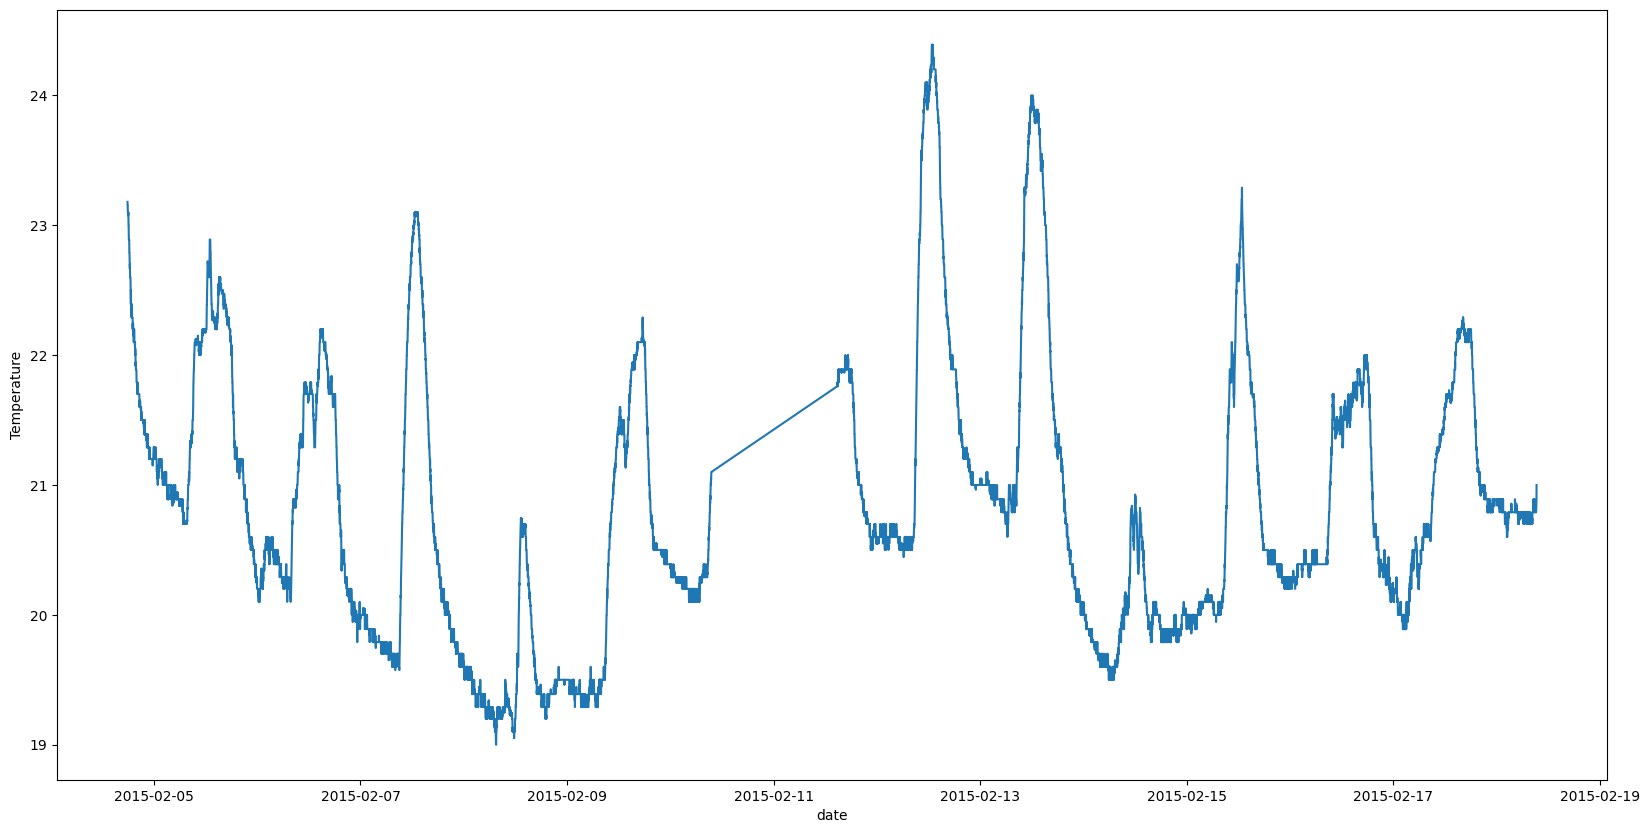

In [47]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Temperature',data=df)
plt.show()

Visualizing the humidity fluctuations over time

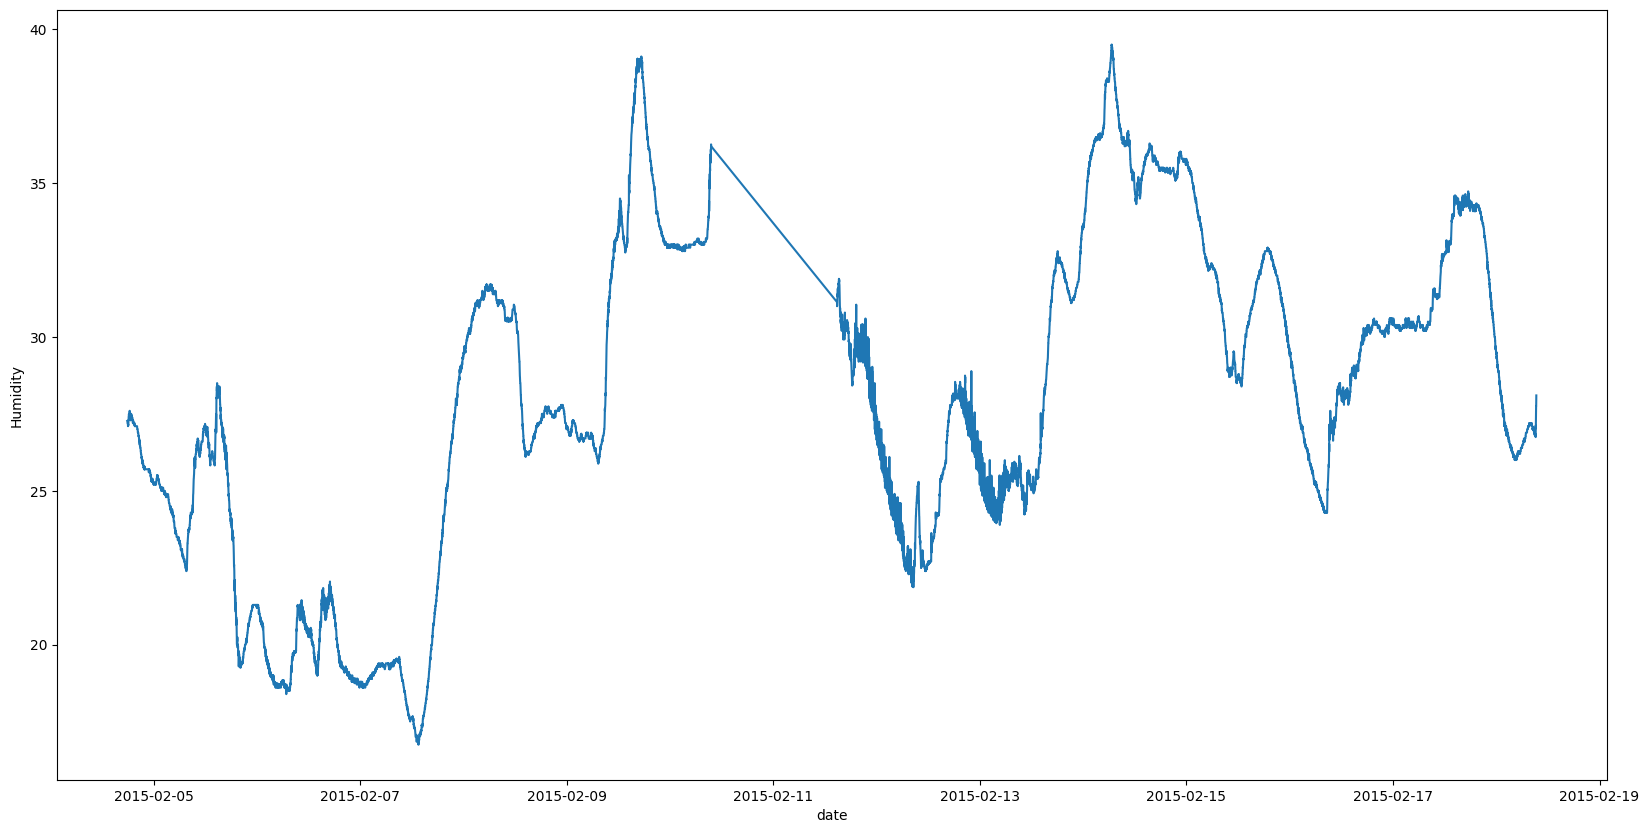

In [48]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Humidity',data=df)
plt.show()

Visualizing the light fluctuations over time

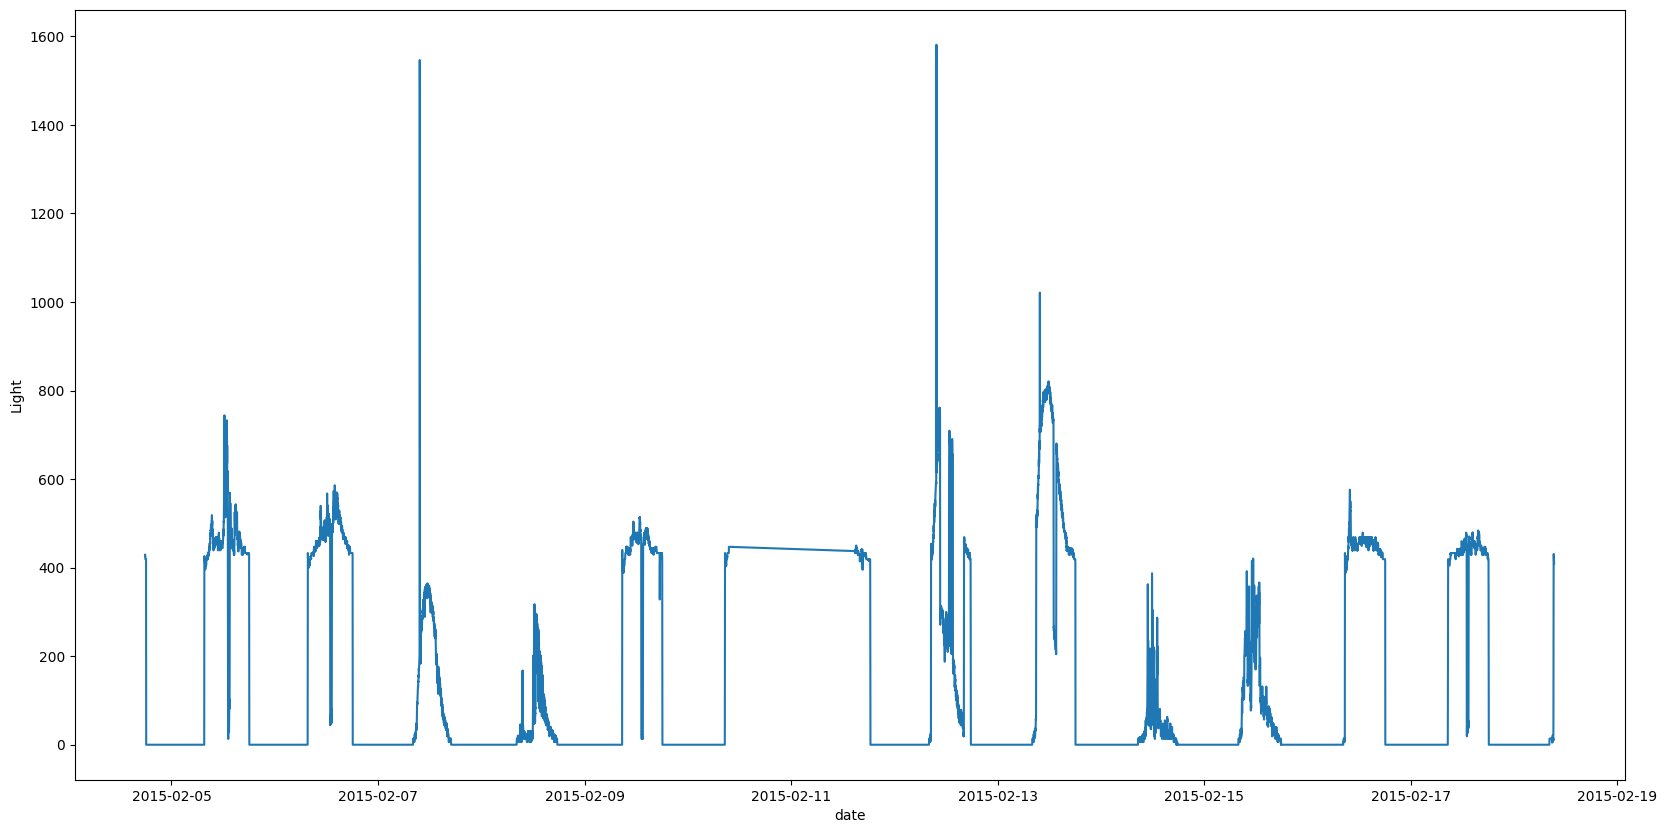

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Light',data=df)
plt.show()

Visualizing the CO2 fluctuations over time

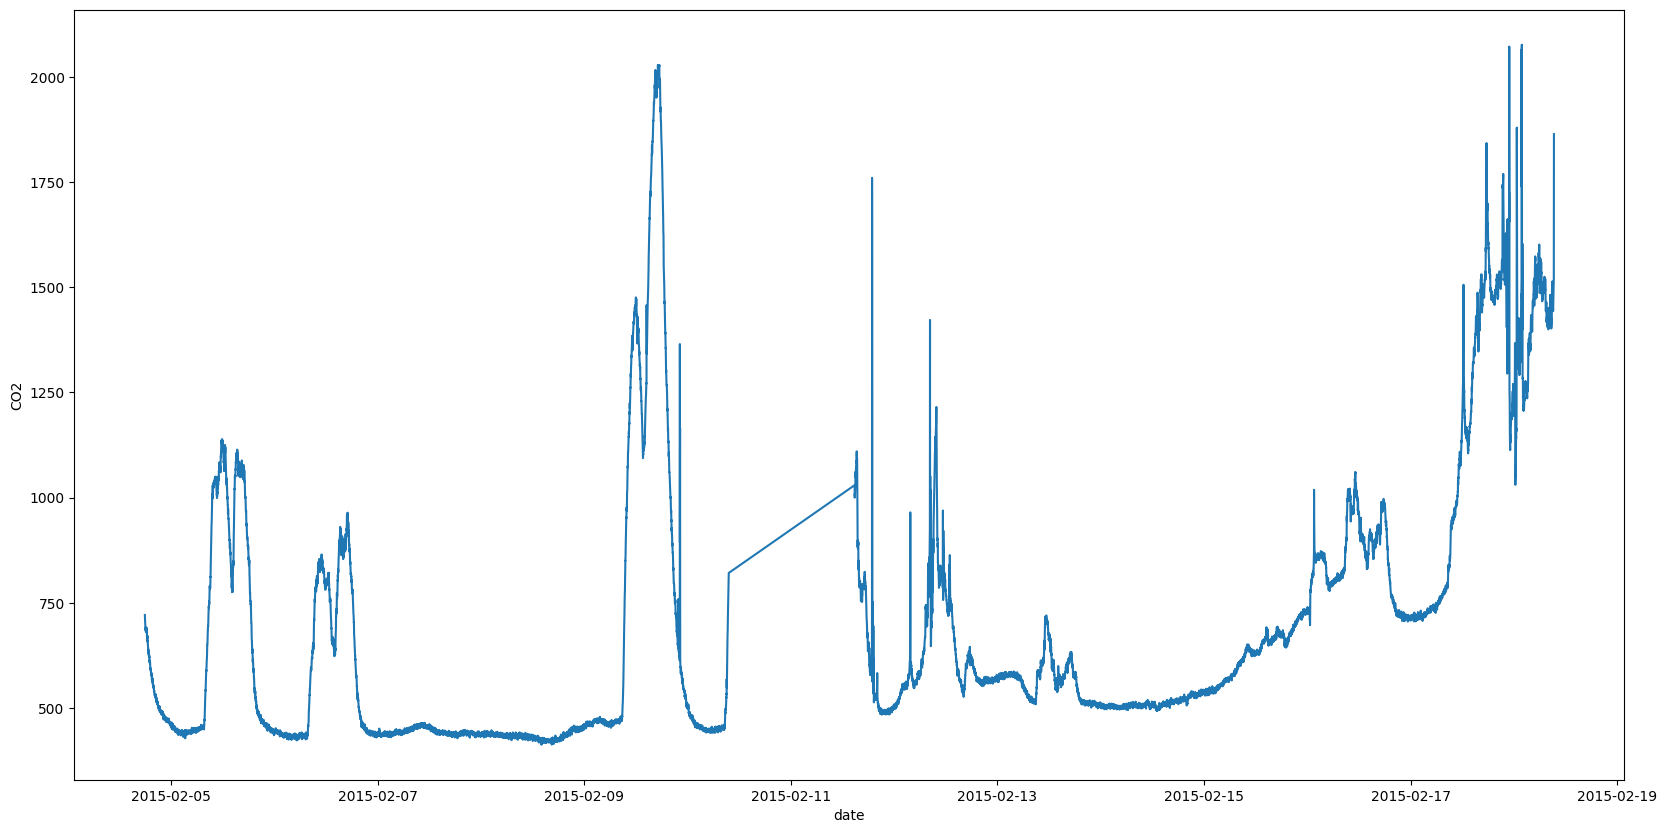

In [50]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='CO2',data=df)
plt.show()

Visualizing the humidity ratio fluctuations over time

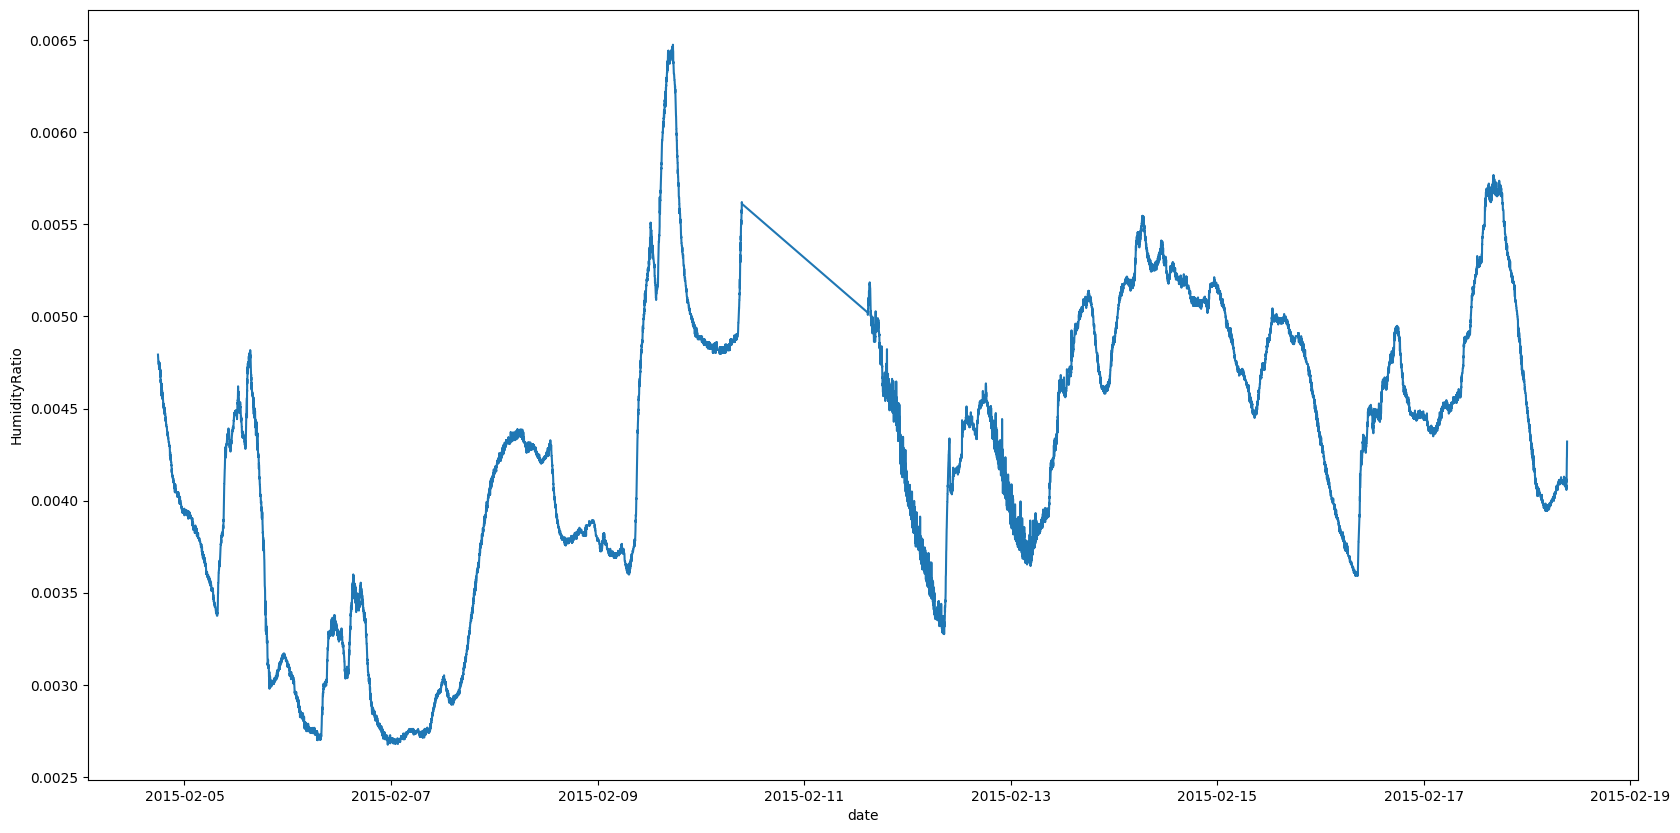

In [51]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='HumidityRatio',data=df)
plt.show()

## Correlation between the variables

Correlation Heatmap

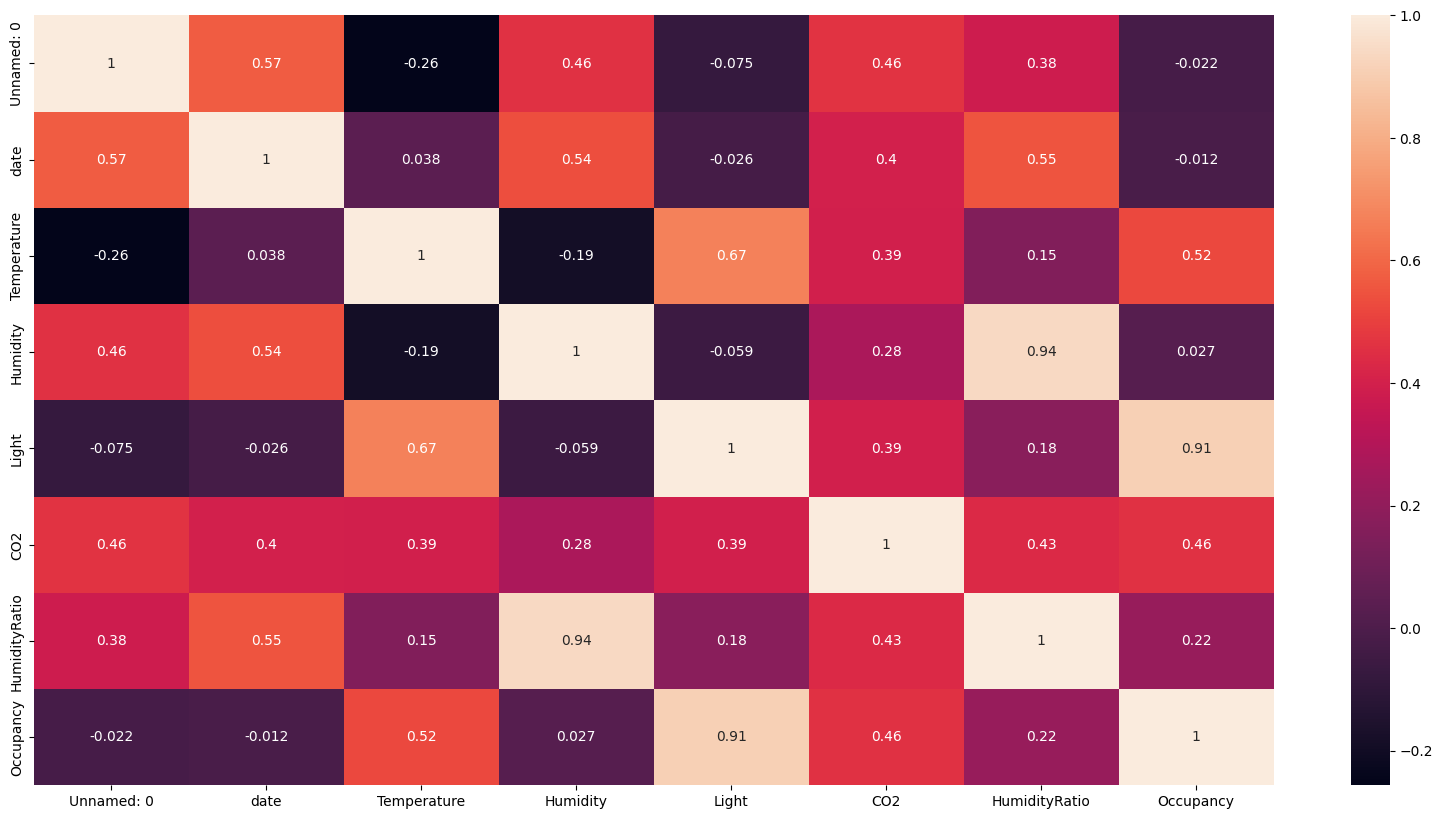

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Temperature and Occupancy

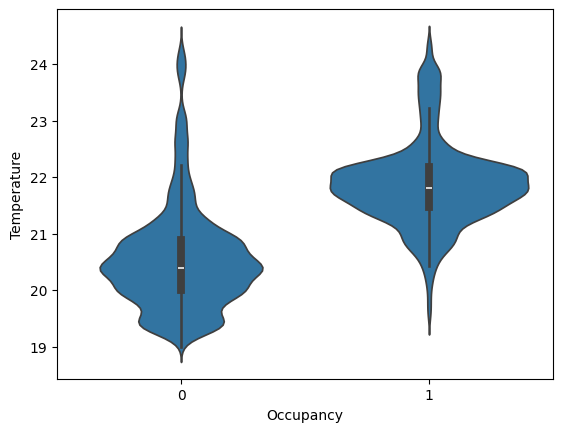

In [53]:
sns.violinplot(y = df['Temperature'],x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('Temperature')
plt.show()

Light and Occupancy

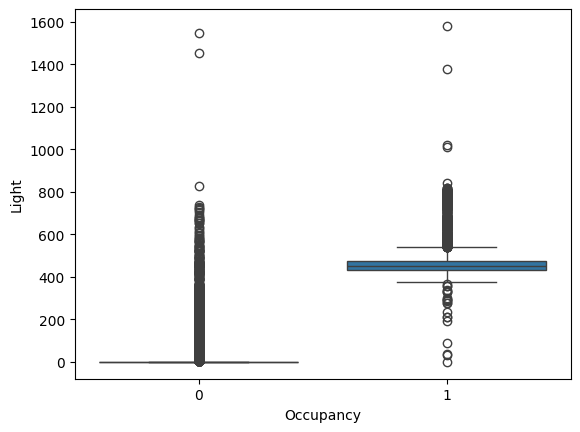

In [54]:
sns.boxplot(y ='Light',x ='Occupancy',data=df)
plt.xlabel('Occupancy')
plt.ylabel('Light')
plt.show()


CO2 and Occupancy

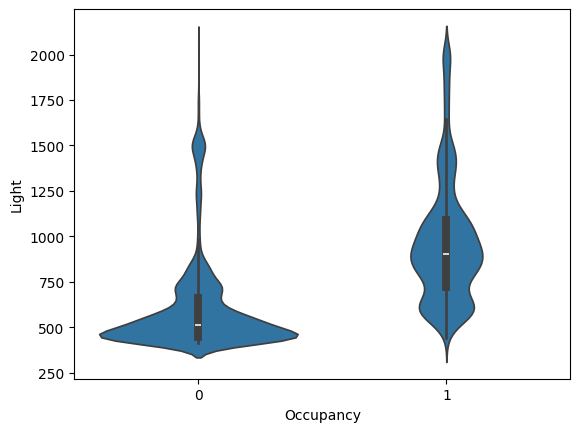

In [55]:
sns.violinplot(y ='CO2',x ='Occupancy',data=df)
plt.xlabel('Occupancy')
plt.ylabel('Light')
plt.show()

## PREPROCESSING-2

In [56]:
df.drop(columns=['Humidity','HumidityRatio','date','Unnamed: 0'],inplace=True,axis=1)

In [57]:
df.head(6)

,Temperature,Light,CO2,Occupancy
0,23.18,426.0,721.25,1
1,23.15,429.5,714.00,1
2,23.15,426.0,713.50,1
3,23.15,426.0,708.25,1
4,23.10,426.0,704.50,1
5,23.10,419.0,701.00,1


## TRAIN TEST SPLIT

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Occupancy'],axis=1),df['Occupancy'],test_size=0.2,random_state=42)

## MODEL BUILDING

Random Tree Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf

RandomForestClassifier()

In [63]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

1.0

In [64]:
rf_pred=rf.predict(x_test)

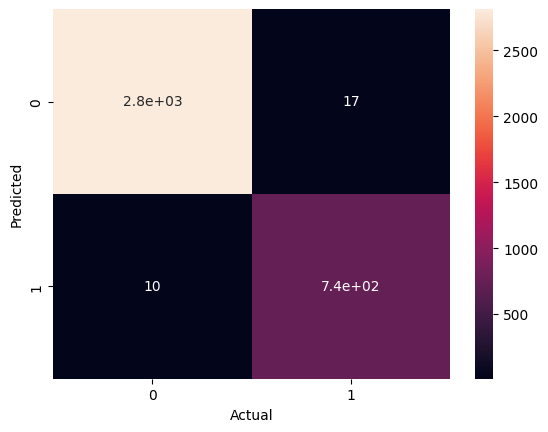

In [65]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

/tmp/ipython-input-2082253020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test,hist=False,label='Actual',color='r')
/tmp/ipython-input-2082253020.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred,hist=False,label='Predicted',color='b',ax=ax)


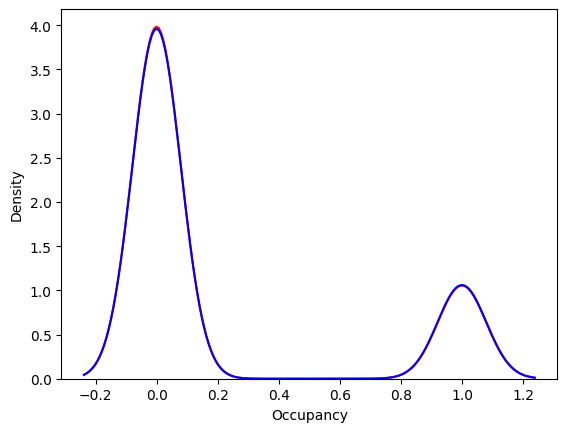

In [67]:
ax=sns.distplot(y_test,hist=False,label='Actual',color='r')
sns.distplot(rf_pred,hist=False,label='Predicted',color='b',ax=ax)
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2830
           1       0.98      0.99      0.98       749

    accuracy                           0.99      3579
   macro avg       0.99      0.99      0.99      3579
weighted avg       0.99      0.99      0.99      3579



In [69]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('accuracy score:',accuracy_score(y_test,rf_pred))
print('precision score:',precision_score(y_test,rf_pred))
print('recall score:',recall_score(y_test,rf_pred))
print('f1 score:',f1_score(y_test,rf_pred))

accuracy score: 0.9924559932942163
precision score: 0.9775132275132276
recall score: 0.986648865153538
f1 score: 0.9820598006644519


Testing the model on new dataset


In [70]:
df_new=pd.read_csv('Train2.csv')
df_new.head()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [71]:
df_new.drop(columns=['Unnamed: 0','Humidity','HumidityRatio','date'],axis=1,inplace=True)

In [72]:
x=df_new.drop(['Occupancy'],axis=1)
y=df_new['Occupancy']

In [73]:
pred=rf.predict(x)

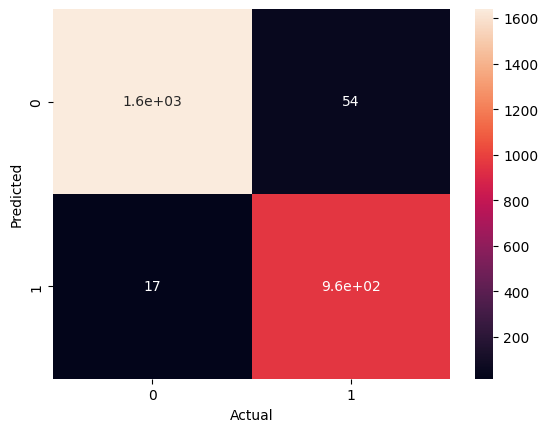

In [74]:
sns.heatmap(confusion_matrix(y,pred),annot=True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

/tmp/ipython-input-2762403321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y,hist=False,label='Actual', color='r')
/tmp/ipython-input-2762403321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred,hist=False,label='Predicted',color='b',ax=ax)


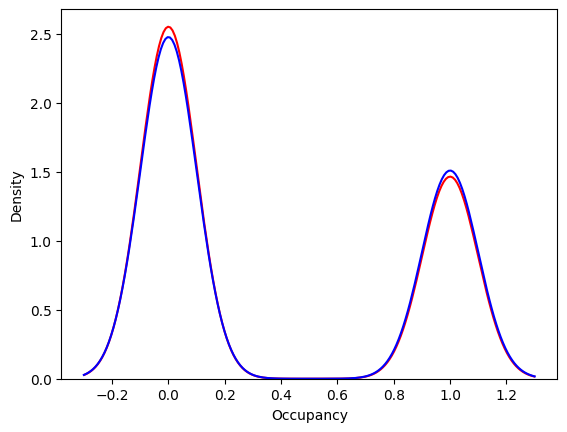

In [75]:
ax = sns.distplot(y,hist=False,label='Actual', color='r')
sns.distplot(pred,hist=False,label='Predicted',color='b',ax=ax)
plt.show()

In [76]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.98      0.96       972

    accuracy                           0.97      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665



In [77]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('accuracy score:',accuracy_score(y,pred))
print('precision score:',precision_score(y,pred))
print('recall score:',recall_score(y,pred))
print('f1 score:',f1_score(y,pred))

accuracy score: 0.973358348968105
precision score: 0.9464816650148662
recall score: 0.9825102880658436
f1 score: 0.9641595153962645


## CONCLUSION

From the above models we can see that the Random Forest Classifier has the highest accuracy score of 97%. Therefore we will be using the Random Forest Classifier for our final model. I also conclude that from the exploratory data analysis, it was found that the change in room temperature, CO levels and light intensity can be used to predict the occupancy of the room, inplace of humidity and humidity ratio.